In [1]:
%load_ext autoreload
%autoreload 2
from Project import Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from typing import Tuple

import os

In [4]:
def stimulus(f : [float], phi : [float], length : int, k = 60) -> np.array:
    return np.array([0.5*( 1 + np.sin(2*np.pi*f*(i/k) + phi) ) for i in range(length)])

## BETA Dataset

Sample function : $$ s(f, \Phi, i) = \dfrac{\sin{[2\pi f (i/\text{RefreshRate}) + \Phi]}}{2} $$

where $\text{RefreshRate} = 60 Hz$ and the indexed frequency and phase values can be obtained by

$$ f_k = f_0 + (k-1)\cdot \Delta f \\ \Phi_k = \Phi_0 + (k - 1)\cdot \Delta \Phi$$

for $f_0 = 8 Hz, \Phi_0 = 0$ and $\Delta f = 0.2 Hz, \Delta \Phi = 0.5 \cdot \pi$

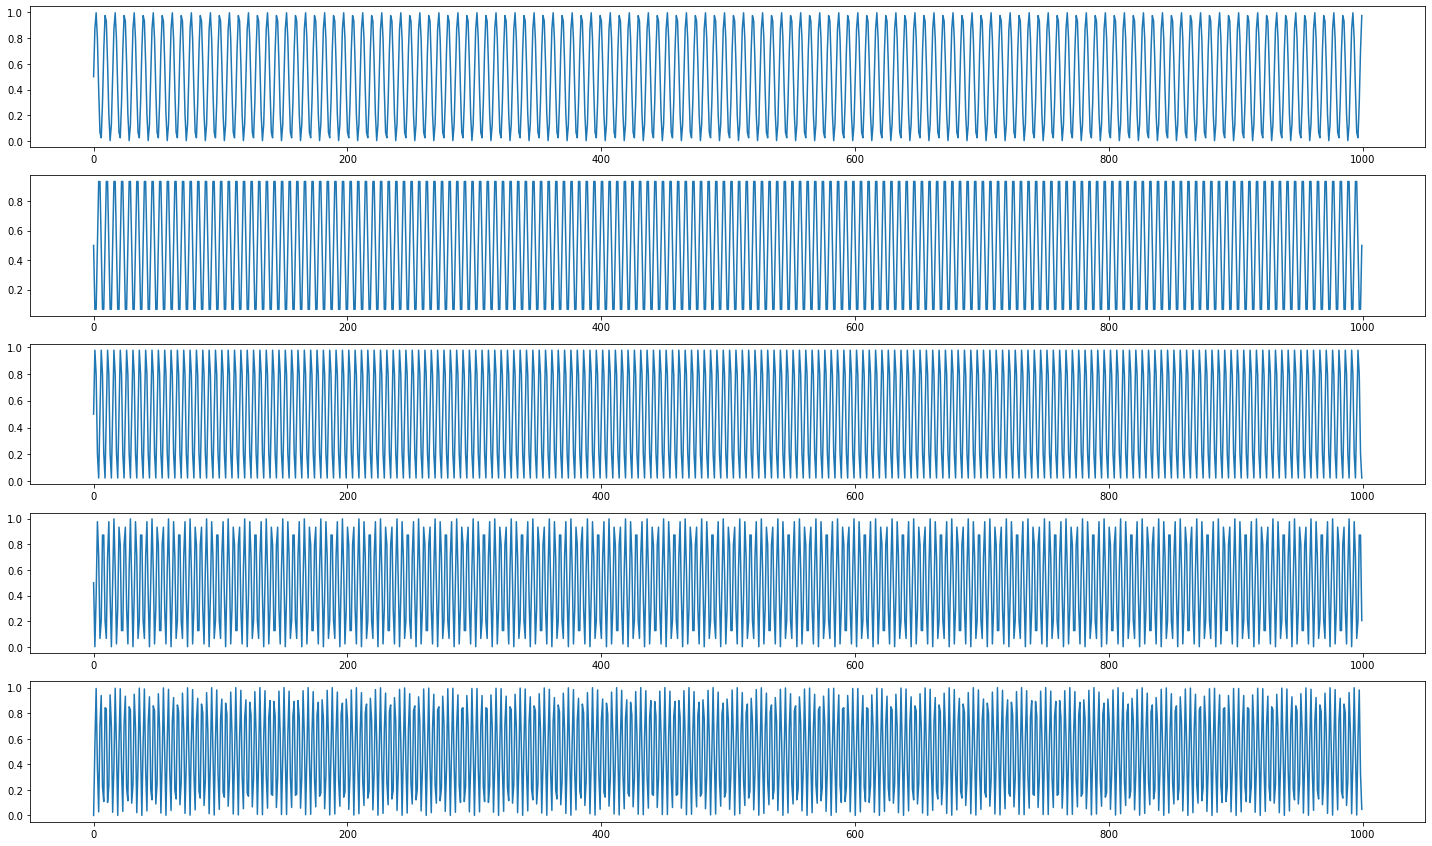

In [7]:
# frequency = np.array([ 8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6,10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2, 13.4, 13.6, 13.8, 14. ,
#                       14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8,  8. ,  8.2,  8.4])
# phases = np.array([0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 
#                    3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 
#                    0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898])

frequency = np.array([8 + (k - 1)*0.2 for k in range(1, 40 + 1)])
phases    = np.array([0 + (k - 1)*0.5*np.pi for k in range(1, 40 + 1)])

signal_length = 1000
stimulus_matrix = np.array([stimulus(f, phi, signal_length) for f, phi in zip(frequency, phases)]) # This will be used later after i parsed the information of each subject
# stimulus_matrix = np.array([stimulus(f_k(k), phi_k(k), signal_length) for k in range(1, 40 + 1)])

fig, ax = plt.subplots(nrows = 5, ncols = 1)
fig.set_size_inches(25, 15)

ax[0].plot(range(signal_length), stimulus_matrix[0])
ax[1].plot(range(signal_length), stimulus_matrix[10])
ax[2].plot(range(signal_length), stimulus_matrix[20])
ax[3].plot(range(signal_length), stimulus_matrix[30])
ax[4].plot(range(signal_length), stimulus_matrix[39])

In [22]:
# Cutting Series

# path = Project.tsinghua_raw_dir / 'beta' / 'separated'
# for t in range(1, 40 + 1):
# # for t in [1]:
#     files = os.listdir(path / str(t))
#     for file in files:
#         X = np.loadtxt((path / str(t) / file).__str__())
#         file_identifier = file[:-4]
#         if X.shape[0] == 1000:
#             X1 = X[:500, :]
#             X2 = X[500:, :]
#         else:
#             X1 = X[:500, :]
#             X2 = X[250:, :]
#         np.savetxt(path / str(t) / (file_identifier + "_1.csv"), X1)
#         np.savetxt(path / str(t) / (file_identifier + "_2.csv"), X2)
#         os.remove(path / str(t) / file)

In [60]:
# Functions used to handle the .mat original files

# def saveSeparatedFiles():
#     files = [file for file in os.listdir(Project.tsinghua_raw_dir / 'beta') if "mat" in file]
#     for s in range(len(files)):
#         path  = Project.tsinghua_raw_dir / 'beta' / files[s]
#         data, subject_info = getData(path)
#         for b in range(4):
#             for t in range(40):
#                 X = data[:, :, b, t].T
#                 output_directory = Project.tsinghua_raw_dir / 'beta' / 'separated' / str()
#                 np.savetxt(Project.tsinghua_raw_dir / 'beta' / 'separated' / str(t+1) / "S{}_{}.csv".format(s+1, b+1), X)
                
# def getData(path):
#     subject = scipy.io.loadmat(path)['data'][0][0]
#     return subject[0], subjectInfo(subject)
                
# class subjectInfo():
#     def __init__(self, subject):
#         self.data = [x for x in subject[1][0][0]]
        
#     def getID(self):
#         return self.data[0].item()
    
#     def getAge(self):
#         return self.data[1].item()
        
#     def getGender(self):
#         return self.data[2].item()
        
#     def getElectrodes(self):
#         electrodes_id = list(range(1, 65))
#         data = pd.DataFrame(index = list(range(1, 65)), columns = ['Name', 'x', 'y'])
#         for i in range(64):
#             d = self.data[3][i][1].astype(np.float64).item()
#             r = self.data[3][i][2].astype(np.float64).item()
#             name = self.data[3][i][3].item()
#             data.loc[i+1] = [name, x, y]
            
#         return data
        
#     def getFrequencies(self):
#         return self.data[4][0]
    
#     def getPhases(self):
#         return self.data[5][0]
    
#     def getVal1(self):
#         return self.data[6][0]
        
#     def getVal2(self):
#         return self.data[7][0]
        
#     def getVal3(self):
#         return self.data[8][0]
        
#     def getSamplingRate(self):
#         return self.data[9][0]

In [28]:
# saveSeparatedFiles()

In [3]:
path  = Project.tsinghua_raw_dir / 'beta' / 'separated' / '1'
files = os.listdir(path)

In [4]:
data = np.loadtxt(path / files[1])
print(data.shape)

(500, 64)


### CCA

***
### Testing Datasets Classes

In [44]:
from Scripts.data.BETADataset import BETADataset

In [45]:
dataset = BETADataset(Project, list(range(1, 5 + 1)), list(range(1, 60 + 1)))

In [47]:
sample, target = next(iter(dataset))

In [48]:
import matplotlib.pyplot as plt